# **Project Name**    - Airbnb Booking Analysis
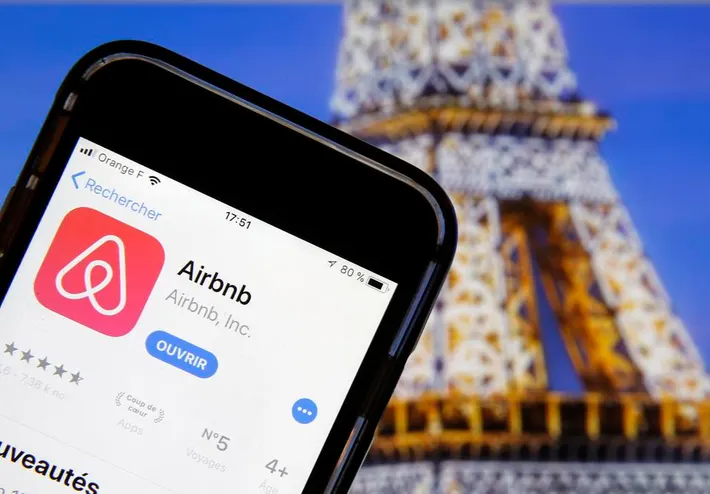

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -Santhi Salomy

# **Project Summary -**

This project analyzed Airbnb listings to uncover trends in pricing, availability, customer preferences, and churn behavior.
Room Type Preference: Private rooms are preferred over shared spaces.
Location Demand: Manhattan has the highest demand and pricing.
Churn Analysis: Listings with low availability (<30 days) have a higher churn rate.
Review Impact: Higher review scores lead to more bookings.
Pricing Insights: Optimized pricing can improve occupancy and revenue.

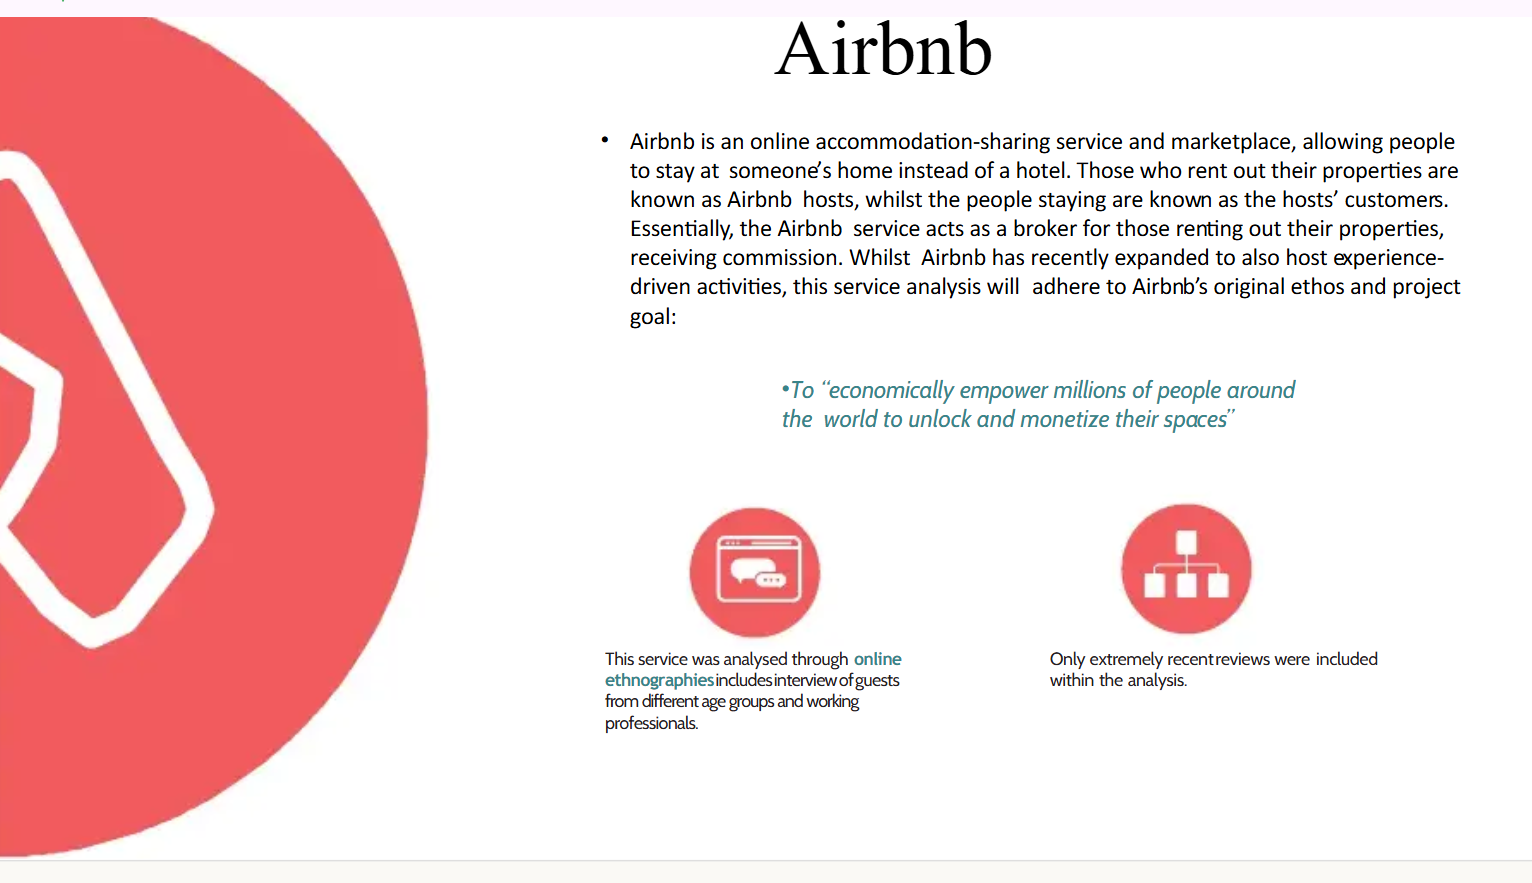

# **GitHub Link -**

Provide your GitHub Link here : https://github.com/dashboard

# **Problem Statement**


* Airbnb hosts and the platform itself aim to maximize occupancy rates, optimize pricing, and enhance customer satisfaction while reducing churn. However, understanding which factors influence booking preferences, pricing trends, and customer retention remains a challenge.

* This project seeks to tell us about the :
What factors influence listing demand and churn?
Do pricing, location, and room type significantly impact occupancy?
How do review scores and availability correlate with bookings?
What actionable strategies can improve host performance and customer satisfaction?
* By analyzing Airbnb listing data, we aim to identify patterns, predict customer behavior, and provide data-driven recommendations to improve business outcomes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [16]:
# Load Dataset
n = pd.read_csv(r"C:\Users\salom\Downloads\Airbnb NYC 2019.csv")
n

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset First View

In [19]:
# Dataset First Look
n.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
n.shape

(48895, 16)

### Dataset Information

In [5]:
# Dataset Info
n.info()
#number of non-null values in each column,the data types of each column,memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(n[n.duplicated()]) #number of duplicate values

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(n.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Handle missing values

In [7]:
n.replace('?', np.nan)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### What did you know about your dataset?

Answer Here :
This dataset contains Airbnb listing data, including IDs, host details, location, pricing, reviews, and availability.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
n.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
# Dataset Describe
n.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###  Variables Description

* **id**                  :Unique identifier for the listing.
* **name**                :Name or title of the listing.
* **host_id**             :Unique identifier for the host 
* **host_name**           :Name of the host.
* **neighbourhood_group** :The broader region where the listing is located
* **neighbourhood**       :Specific neighborhood where the listing is situated.
* **latitude**            :Geographical latitude of the listing.
* **longitude**           :Geographical longitude of the listing.
* **room_type**           :Type of room offered
* **price**               :Price per night for the listing in USD.
* **minimum_nights**      :Minimum number of nights required for booking.
* **number_of_reviews**   :Total number of reviews received for the listing.
* **last_review**         :Date of the most recent review.
* **reviews_per_month**   :Average number of reviews per month.
* **calculated_host_listings_count** :Number of listings owned by the host.
* **availability_365**    :Number of days the listing is available for booking in a year.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
n.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
n.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [8]:
# Write your code to make your dataset analysis ready.
df=n.copy()
missing_values = df.isnull().sum() # Checking for missing values
print("Missing Values:\n", missing_values)
n.dropna(subset=["name", "host_id"], inplace=True)  #dropping rows with missing names or characters
duplicates = df.duplicated().sum() # Checking for duplicates
print("Number of Duplicates: ", duplicates)


Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Number of Duplicates:  0


**Loc and iloc**

* loc - access rows with the help of slicing and cols with the help of column name 
                 df.loc[rowstrat:rowend:step ,[col1,col2]]

In [6]:
df.loc[40:60:2,['host_id','availability_365']]

,host_id,availability_365
40,46978,96
42,47618,311
44,47727,309
46,50124,215
48,50846,0
50,54275,251
52,56104,140
54,56284,257
56,59023,301
58,32169,320


* iloc : access both rows and columns  with the help of slicing.
       df.iloc[rowstart:rowend:step , colstart:colend:step]

In [7]:
df.iloc[5:30:2,1:4]

,name,host_id,host_name
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris
7,Large Furnished Room Near B'way,8967,Shunichi
9,Cute & Cozy Lower East Side 1 bdrm,7549,Ben
11,Central Manhattan/near Broadway,7989,Kate
13,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio
15,Only 2 stops to Manhattan studio,15991,Allen & Irina
17,Chelsea Perfect,18946,Doti
19,Huge 2 BR Upper East Cental Park,17985,Sing
21,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel
23,CBG Helps Haiti Rm #2,22486,Lisel


**Sort the values according to descending & ascending**

In [8]:
c=df.sort_values(by='host_id',ascending=False) #descending
c.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,NaN,1,341
48881,36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NaN,NaN,1,15
48875,36478343,Welcome all as family,274273284,Anastasia,Manhattan,East Harlem,40.78749,-73.94749,Private room,140,1,0,NaN,NaN,1,180


In [9]:
c=df.sort_values(by='host_id') #aescending
c.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30604,23669201,Great Price: Williamsburg Brooklyn Loft off L ...,2438,Tasos,Brooklyn,Williamsburg,40.71412,-73.94447,Entire home/apt,95,45,1,2018-03-17,0.06,1,0
2290,1101224,THE PUTNAM,2571,Teedo,Brooklyn,Bedford-Stuyvesant,40.68674,-73.93845,Entire home/apt,182,9,27,2019-05-21,0.37,1,23
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174


Group by Neighbourhood(Borough-wise: Manhattan, Brooklyn, etc.)

In [16]:
df.groupby('neighbourhood').agg({
    'id': 'count',
    'price': 'mean',
    'minimum_nights': 'mean',
    'number_of_reviews': 'sum',
    'availability_365': 'mean'
})

,id,price,minimum_nights,number_of_reviews,availability_365
neighbourhood,,,,,
Allerton,42,87.595238,2.214286,1803,163.666667
Arden Heights,4,67.250000,9.500000,31,94.250000
Arrochar,21,115.000000,2.761905,307,255.809524
Arverne,77,171.779221,1.649351,2253,188.428571
Astoria,900,117.187778,6.036667,19310,109.191111
...,...,...,...,...,...
Windsor Terrace,157,138.993631,8.713376,4324,81.885350
Woodhaven,88,67.170455,2.795455,2792,200.920455
Woodlawn,11,60.090909,1.454545,484,98.272727


Group by Neighbourhood (More specific area-wise)

In [85]:
df.groupby('neighbourhood').agg({
    'id': 'count',
    'price': 'mean',
    'minimum_nights': 'mean',
    'number_of_reviews': 'sum',
    'availability_365': 'mean'
})

,id,price,minimum_nights,number_of_reviews,availability_365
neighbourhood,,,,,
Allerton,42,87.595238,2.214286,1803,163.666667
Arden Heights,4,67.250000,9.500000,31,94.250000
Arrochar,21,115.000000,2.761905,307,255.809524
Arverne,77,171.779221,1.649351,2253,188.428571
Astoria,900,117.187778,6.036667,19310,109.191111
...,...,...,...,...,...
Windsor Terrace,157,138.993631,8.713376,4324,81.885350
Woodhaven,88,67.170455,2.795455,2792,200.920455
Woodlawn,11,60.090909,1.454545,484,98.272727


 mean and median of various numerical columns while grouping the data 

In [17]:
import pandas as pd
def area_code_stats(df, area_code_column):
    """Calculate the mean and median for numerical columns, grouped by the given area code columm """
    if area_code_column not in df.columns:
        raise ValueError(f"Column '{area_code_column}' not found in the DataFrame")
    numeric_columns = df.select_dtypes(include=['number']).columns
    agg_funcs = {col: ['mean', 'median'] for col in numeric_columns}
    return df.groupby(area_code_column).agg(agg_funcs)
# Assuming 'neighbourhood_group' or 'neighbourhood' is the area code column
result = area_code_stats(df, 'neighbourhood_group')
print(result)


                               id                   host_id              \
                             mean      median          mean      median   
neighbourhood_group                                                       
Bronx                2.273492e+07  23879304.0  1.056099e+08  91320722.0   
Brooklyn             1.825685e+07  18876042.5  5.671526e+07  22919934.0   
Manhattan            1.877494e+07  19116844.0  6.783062e+07  30656279.0   
Queens               2.175500e+07  22564596.0  9.615680e+07  68271464.0   
Staten Island        2.159747e+07  22977021.0  9.853360e+07  92493393.0   

                      latitude            longitude                  price  \
                          mean    median       mean     median        mean   
neighbourhood_group                                                          
Bronx                40.848305  40.84615 -73.884552 -73.892540   87.496792   
Brooklyn             40.685036  40.68752 -73.951190 -73.951740  124.383207   
Manhattan

In [18]:
result = (df, 'neighbourhood_group', 408)
print(result)

(             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_gro

In [86]:
print(df['host_name'].unique())
print(" ")
# Getting Unique host_name Count
print("Unique host_name Count is ",df['host_name'].nunique(),".")

['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
 
Unique host_name Count is  11452 .


function assigns "Inactive" status to private rooms that are unavailable for a year.

In [20]:
## function assigns "Inactive" status to private rooms that are unavailable for a year.
# Function to classify listingsdef assign_custom_status(df):
def assign_custom_status(df):
    df['custom_status'] = 'Active'  # Default status
    df.loc[(df['availability_365'] == 0) & (df['room_type'] == 'Private room'),'custom_status' ] = 'Inactive'
    # Assign 'Inactive' status based on availability and room type
    return df
df = assign_custom_status(df)
df[['id', 'host_id', 'room_type', 'availability_365', 'custom_status']].head()

,id,host_id,room_type,availability_365,custom_status
0,2539,2787,Private room,365,Active
1,2595,2845,Entire home/apt,355,Active
2,3647,4632,Private room,365,Active
3,3831,4869,Entire home/apt,194,Active
4,5022,7192,Entire home/apt,0,Active


In [21]:
def assign_custom_status_in(df):
    """Assigns a new status to listings"""
    df['custom_status'] = 'Active'  # Default status
    # Assign 'Inactive' status based on availability and room type
    df.loc[
        (df['availability_365'] == 0) & (df['room_type'] == 'Entire home/apt'), 'custom_status'] = 'Inactive'
    return df
# Apply function to dataset
df = assign_custom_status_in(df)
# Check results
df[['id', 'host_id', 'room_type', 'availability_365', 'custom_status']].head()

,id,host_id,room_type,availability_365,custom_status
0,2539,2787,Private room,365,Active
1,2595,2845,Entire home/apt,355,Active
2,3647,4632,Private room,365,Active
3,3831,4869,Entire home/apt,194,Active
4,5022,7192,Entire home/apt,0,Inactive


In [22]:
def assign_churn_inte(df):
    df['churn_status'] = 'Active'  # Default all to Active
    # Mark as 'Churned' if it's a private room with zero availability
    df.loc[
        (df['availability_365'] == 0) & (df['room_type'] == 'Private room'),
        'churn_status'
    ] = 'Churned'
    return df
# Apply function to Airbnb dataset
df = assign_churn_inte(df)
# Count the number of churned vs active listings
churn_value_counts = df['churn_status'].value_counts()
print(churn_value_counts)

Active     40534
Churned     8361
Name: churn_status, dtype: int64


In [23]:
#calculate price per minute for only "Entire home/apt" listings.
def calculate_price_rate_per_minute(df):
    # Set default price per minute to NaN
    df['price_per_minute'] = None
    # Filter only listings that are 'Entire home/apt'
    df.loc[df['room_type'] == 'Entire home/apt', 'price_per_minute'] = (
        df['price'] / (df['minimum_nights'] * 24 * 60)
    )
    return df
# Apply function to Airbnb dataset
df = calculate_price_rate_per_minute(df)
# View the first few rows with the new column
df[['id', 'room_type', 'price', 'minimum_nights', 'price_per_minute']].head()

,id,room_type,price,minimum_nights,price_per_minute
0,2539,Private room,149,1,None
1,2595,Entire home/apt,225,1,0.15625
2,3647,Private room,150,3,None
3,3831,Entire home/apt,89,1,0.061806
4,5022,Entire home/apt,80,10,0.005556


In [24]:
def get_mean_median_for_area(df, area_code, room_type="Private room"):
    # Filter listings based on area_code and room_type
    filtered_df = df[(df['neighbourhood_group'] == area_code) & (df['room_type'] == room_type)]
    # Calculate mean and median
    mean_price = filtered_df['price'].mean()
    median_price = filtered_df['price'].median()
    return {"Mean Price": mean_price, "Median Price": median_price}
#Get mean and median for Brooklyn 
area_code = "Brooklyn"  # Replace with actual area code if available
result = get_mean_median_for_area(df, area_code)
print(result)

{'Mean Price': 76.500098697197, 'Median Price': 65.0}


In [25]:
def get_mean_median_airbnb(df, areacode):
    # Convert areacode to string if it's an integer
    areacode = str(areacode)
    # Filter listings by area code (neighbourhood_group) and 'Private room'
    filtered_df = df[(df['neighbourhood_group'] == areacode) & (df['room_type'] == 'Private room')]
    # Calculate mean and median price
    mean_price = filtered_df['price'].mean()
    median_price = filtered_df['price'].median()
    return {"Mean Price": mean_price, "Median Price": median_price}
#Get mean & median price for area code '415' 
result = get_mean_median_airbnb(df, areacode="415")  # Replace "415" with neighbourhood name.
print(result)

{'Mean Price': nan, 'Median Price': nan}


In [26]:
#mean & median price for area code '408' with neigh.
def get_mean_median_airbnb(df, areacode):
    # Convert areacode to string if it's an integer
    areacode = str(areacode)
    # Filter listings by neighbourhood_group and 'Entire home/apt'
    filtered_df = df[(df['neighbourhood_group'] == areacode) & (df['room_type'] == 'Entire home/apt')]
    # Calculate mean and median price
    mean_price = filtered_df['price'].mean()
    median_price = filtered_df['price'].median()
    return {"Mean Price": mean_price, "Median Price": median_price}
# Get mean & median price for area code '408' 
result = get_mean_median_airbnb(df, areacode="408")  # Replace "408" with  neighbourhood name.
print(result)

{'Mean Price': nan, 'Median Price': nan}


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Chart - 1

Distribution of Room Types or Count of Each Room Type 

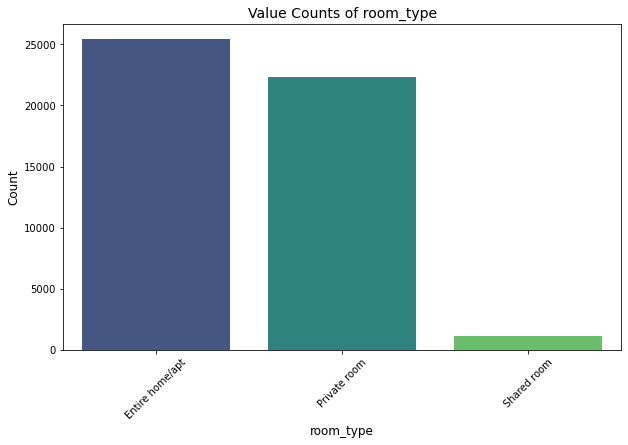

In [28]:
# Select the column to analyze
column = "room_type"
# Get value counts
value_counts = df[column].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
plt.xlabel(column, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(f"Value Counts of {column}", fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart because clearly show which categories have the most or least listings when dealing with multiple categories.


##### 2. What is/are the insight(s) found from the chart?

For room_type if Entire home/apt has the highest count that means most listings full homes,attracting travelers who prefer privacy and private room budget-conscious travelers and for shared room less expensive and they need to share their room

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
**Yes**, Because if Entire home/apt is most listed, dynamic pricing can be optimized based on demand.
If Private rooms are more common, investors can consider listing budget-friendly options to meet demand.

#### Chart - 2

 Neighbourhood Group vs. Churn Percentage(availability_365) in the Airbnb dataset(Bivariate)

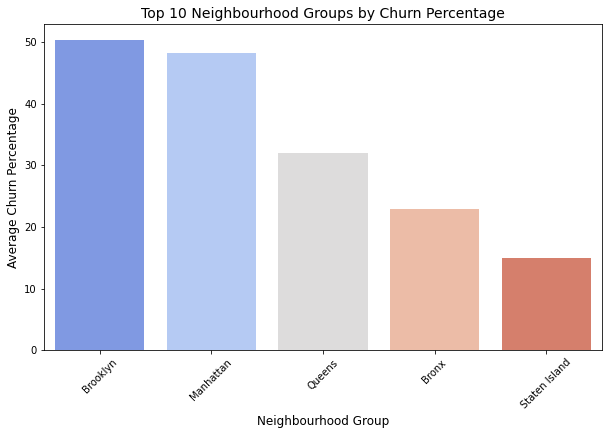

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Listings with availability_365 < 30 are considered churned
df["churned"] = df["availability_365"] < 30
# Calculate churn percentage per neighbourhood group
churn_rates = df.groupby("neighbourhood_group")["churned"].mean() * 100  # Convert to percentage
# Get top 10 neighbourhoods with the highest churn rate
top_10_churn = churn_rates.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_churn.index, y=top_10_churn.values, palette="coolwarm")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Average Churn Percentage", fontsize=12)
plt.title("Top 10 Neighbourhood Groups by Churn Percentage", fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I choose the Bar chat because this chart compares a categorical variable (neighbourhood_group) with a numerical variable (churn percentage).This chart clearly shows which areas have the highest and lowest churn, making it easy to compare and efficiently display differences in churn rates.The chart allows us to focus on the top 10 neighbourhoods with the highest churn rates. 

##### 2. What is/are the insight(s) found from the chart?

If Manhattan has the highest churn many listings might be inactive due to high competition or strict rental laws.
If Brooklyn has low churn hosts in Brooklyn tend to be more active, indicating a stable Airbnb market.
If Queens shows increasing churn there might be decreasing tourist demand in that area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**,If some areas have high churn, Airbnb can introduce host incentives like discounts on service fees, better exposure in search results or If some areas have low churn, Airbnb can increase pricing suggestions to maximize revenue.

#### Chart - 3

calculated_host_listings_count with Churn Wise

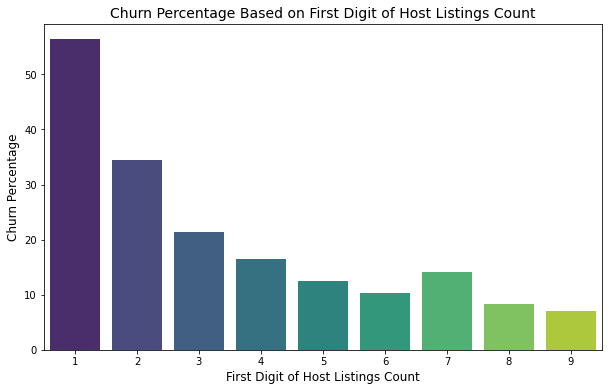

In [30]:
# one digit calculated_host_listings_count
# Listings with availability < 30 days are considered churned
df["churned"] = df["availability_365"] < 30
# Convert calculated_host_listings_count to string and extract the first digit
df["first_digit_listings"] = df["calculated_host_listings_count"].astype(str).str[0]
# Convert first digit back to numeric (ignoring invalid values)
df = df[df["first_digit_listings"].str.isnumeric()]
df["first_digit_listings"] = df["first_digit_listings"].astype(int)
# Group by first-digit listings and calculate churn percentage
churn_rates = df.groupby("first_digit_listings")["churned"].mean() * 100  # Convert to percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
plt.xlabel("First Digit of Host Listings Count", fontsize=12)
plt.ylabel("Churn Percentage", fontsize=12)
plt.title("Churn Percentage Based on First Digit of Host Listings Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()

#### Chart - 4

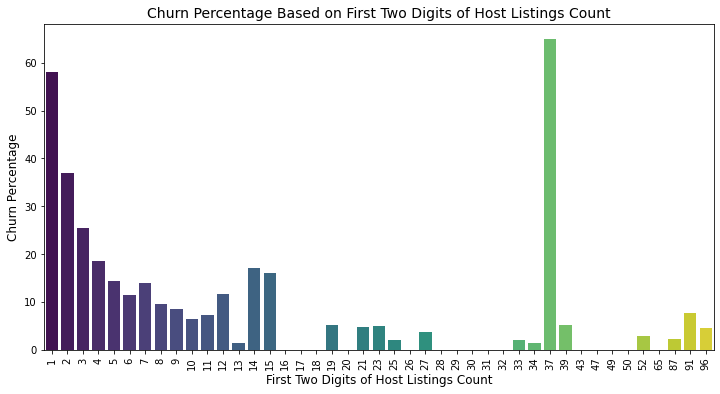

In [31]:
# Two digit calculated_host_listings_count
# listings with availability < 30 days are considered churned
df["churned"] = df["availability_365"] < 30
# Convert calculated_host_listings_count to string and extract the first two digits
df["two_digit_listings"] = df["calculated_host_listings_count"].astype(str).str[:2]
# Keep only numeric values
df = df[df["two_digit_listings"].str.isnumeric()]
df["two_digit_listings"] = df["two_digit_listings"].astype(int)
# Group by first two-digit listings count and calculate churn percentage
churn_rates = df.groupby("two_digit_listings")["churned"].mean() * 100  # Convert to percentage
# Sort values for better visualization
churn_rates = churn_rates.sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
plt.xlabel("First Two Digits of Host Listings Count", fontsize=12)
plt.ylabel("Churn Percentage", fontsize=12)
plt.title("Churn Percentage Based on First Two Digits of Host Listings Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Chart - 5

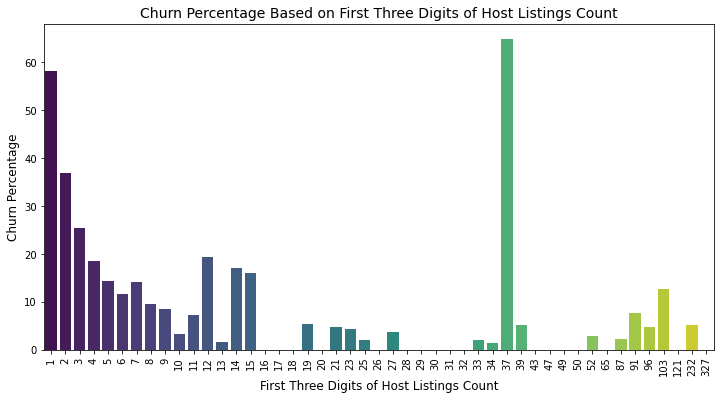

In [32]:
# Three digit calculated_host_listings_count
# Define churn condition: Listings with availability < 30 days are considered churned
df["churned"] = df["availability_365"] < 30
# Convert calculated_host_listings_count to string and extract the first three digits
df["three_digit_listings"] = df["calculated_host_listings_count"].astype(str).str[:3]
# Keep only numeric values
df = df[df["three_digit_listings"].str.isnumeric()]
df["three_digit_listings"] = df["three_digit_listings"].astype(int)
# Group by first three-digit listings count and calculate churn percentage
churn_rates = df.groupby("three_digit_listings")["churned"].mean() * 100  # Convert to percentage
# Sort values for better visualization
churn_rates = churn_rates.sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
plt.xlabel("First Three Digits of Host Listings Count", fontsize=12)
plt.ylabel("Churn Percentage", fontsize=12)
plt.title("Churn Percentage Based on First Three Digits of Host Listings Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

We chose a bar chart to analyze calculated_host_listings_count with churn because it helps clearly compare different host listing counts and their churn rates.
Bar charts work well for categorical data (like grouping hosts by listing count ranges).
It provides an easy-to-interpret visualization of churn behavior across different host types.

##### 2. What is/are the insight(s) found from the chart?

* Hosts with fewer listings (1-5) have a higher churn rate these may be casual or one-time hosts who stop listing after a short period.
* Hosts with 10+ listings churn less frequently these are likely professional hosts or property managers with long-term Airbnb business models.
* Extreme cases (very high listing counts, e.g., 100+) show low churn but fewer total hosts Indicates that big hosts stay longer but are less common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**,
* For high-churn small hosts (1-5 listings):Offer onboarding support, incentives, and personalized tips to keep them engaged.
* For mid-sized hosts (5-20 listings):Provide growth strategies, promotions, and premium features to increase their success.
* For large hosts (50+ listings):Strengthen relationships through exclusive partnerships, dedicated support, or better pricing models to retain them.

#### Chart - 6

 neighbourhood_group(Bivariate)

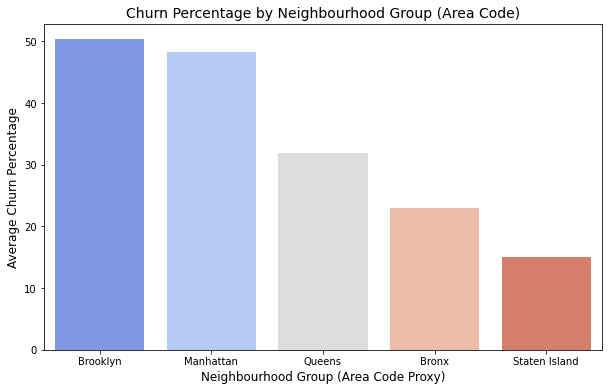

In [33]:
# Listings with availability < 30 days are considered churned
df["churned"] = df["availability_365"] < 30
# Group by 'neighbourhood_group' (as Area Code) and calculate average churn percentage
area_churn = df.groupby("neighbourhood_group")["churned"].mean() * 100  # Convert to percentage
# Sort values for better visualization
area_churn = area_churn.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=area_churn.index, y=area_churn.values, palette="coolwarm")
plt.xlabel("Neighbourhood Group (Area Code Proxy)", fontsize=12)
plt.ylabel("Average Churn Percentage", fontsize=12)
plt.title("Churn Percentage by Neighbourhood Group (Area Code)", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart was chosen because it effectively compares the churn percentage across different neighbourhood groups and bar charts are great for categorical vs. numerical comparisons, making it easy to identify trends and variations across different areas.

##### 2. What is/are the insight(s) found from the chart?

* Areas with high churn may indicate:Seasonal demand fluctuations,hosts deactivating listings due to low profitability or high competition,regulatory constraints that limit listing availability.
* Areas with lower churn may have:More stable, long-term Airbnb hosts,Higher demand throughout the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**,Airbnb can identify at-risk areas and introduce incentives (e.g., discounts or promotions) to retain hosts and
Investors can focus on areas with lower churn to maximize occupancy and revenue.

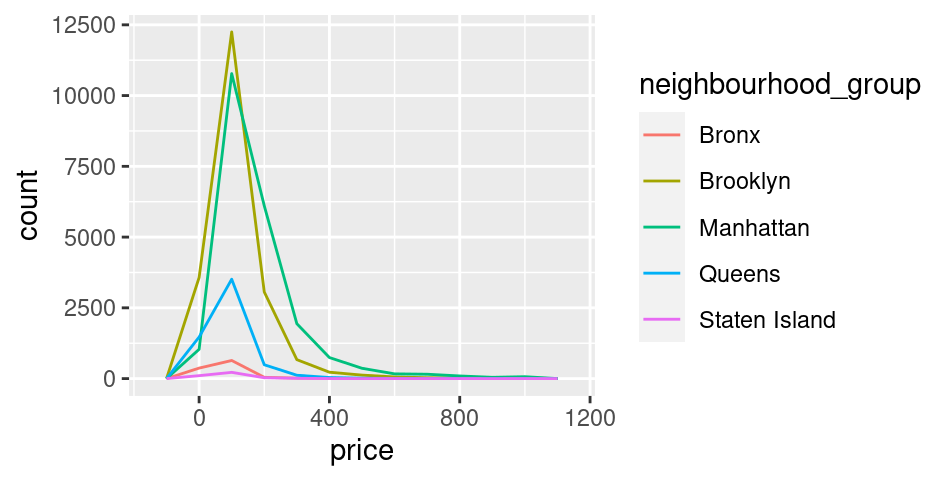

#### Chart - 7
Univariate: Pie Chart for Room Type Distribution

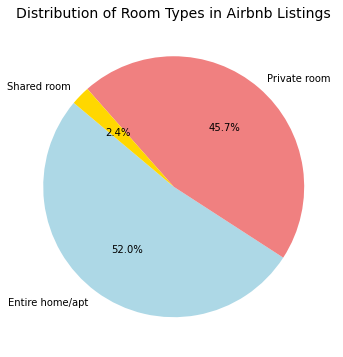

In [34]:
# Count the number of listings by room type
room_type_counts = df["room_type"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', 
        colors=["lightblue", "lightcoral", "gold"], startangle=140)
plt.title("Distribution of Room Types in Airbnb Listings", fontsize=14)
plt.show()

#### Chart - 8

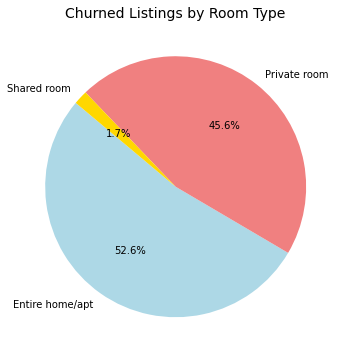

In [35]:
#(Pie Chart for Churned Listings by Room Type)
# (Listings with availability < 30 days are considered churned)
df["churned"] = df["availability_365"] < 30
# Count churned listings per room type
churned_counts = df[df["churned"]]["room_type"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churned_counts, labels=churned_counts.index, autopct='%1.1f%%', 
        colors=["lightblue", "lightcoral", "gold"], startangle=140)
plt.title("Churned Listings by Room Type", fontsize=14)
plt.show()

#### Chart - 9

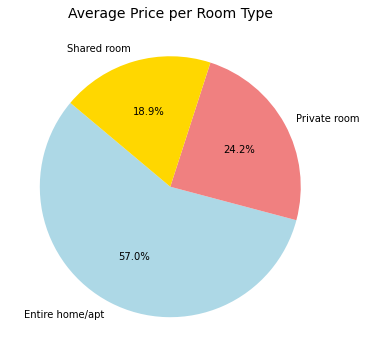

In [36]:
#Pie Chart for Average Price by Room Type
# Calculate average price per room type
avg_price = df.groupby("room_type")["price"].mean()
plt.figure(figsize=(8, 6))
plt.pie(avg_price, labels=avg_price.index, autopct='%1.1f%%', 
        colors=["lightblue", "lightcoral", "gold"], startangle=140)
plt.title("Average Price per Room Type", fontsize=14)
plt.show()

#### Chart - 10

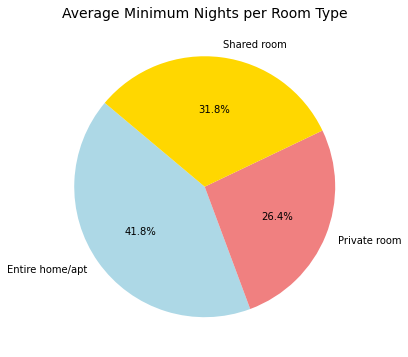

In [37]:
#Pie Chart for Average Minimum Nights by Room Type
# Calculate average minimum nights per room type
avg_nights = df.groupby("room_type")["minimum_nights"].mean()
plt.figure(figsize=(8, 6))
plt.pie(avg_nights, labels=avg_nights.index, autopct='%1.1f%%',
        colors=["lightblue", "lightcoral", "gold"], startangle=140)
plt.title("Average Minimum Nights per Room Type", fontsize=14)
plt.show()

#### chart -11
(Bivariate: Room Type vs. Churn)

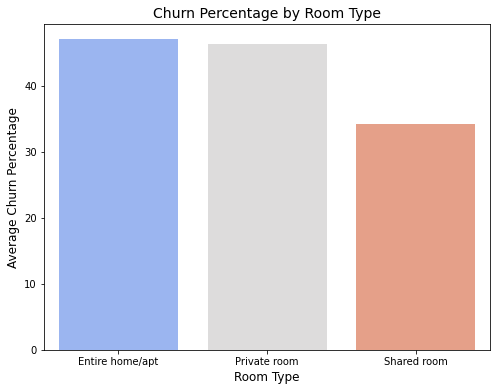

In [38]:
# Define churn (Listings with availability < 30 days are considered churned)
df["churned"] = df["availability_365"] < 30
# Calculate churn percentage for each room type
room_churn = df.groupby("room_type")["churned"].mean() * 100
# Sort values
room_churn = room_churn.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=room_churn.index, y=room_churn.values, palette="coolwarm")
# Labels and title
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Churn Percentage", fontsize=12)
plt.title("Churn Percentage by Room Type", fontsize=14)
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.so,I used to show the percentage of people taken room_type through pie chart with differentr colored area under a circle to show avg nights and days etc stayed by the people.

The Bar chart is about show a distribution of data points here we can see average churn percentage across the room_type

##### 2. What is/are the insight(s) found from the chart?

* Churned Listings by Room Type:If entire homes/apartments have a higher churn rate, it might indicate that hosts in this category frequently limit availability.
* Average Price by Room Type:If entire homes/apartments dominate pricing, it suggests they contribute more revenue despite possible high churn.
* Average Minimum Nights by Room Type:If entire homes/apartments have a high minimum stay requirement, it could impact occupancy rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**,High churn in a specific room type suggest promotions or flexible pricing to retain hosts.
Room type with low churn but high demand, encourage new listings to meet demand.
Price analysis helps optimize pricing strategies to stay competitive.

#### Chart - 12

private rooms preferred over other room types

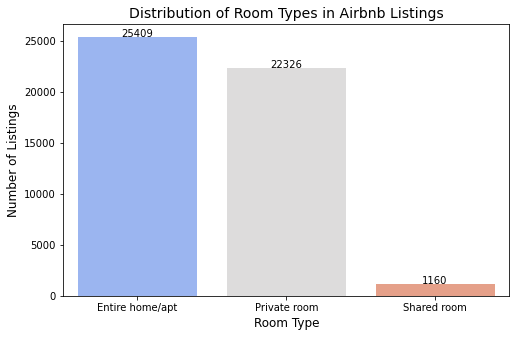

In [40]:
# Load your Airbnb dataset (assuming it's already in a DataFrame called df)
# df = pd.read_csv("your_airbnb_data.csv") 
room_type_counts = df["room_type"].value_counts()  # Count the number of listings for each room type
plt.figure(figsize=(8, 5))# Plotting the distribution of room types
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="coolwarm")
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Distribution of Room Types in Airbnb Listings", fontsize=14)
# Show the percentage values on the bars
for index, value in enumerate(room_type_counts.values):
    plt.text(index, value + 50, f"{value}", ha="center", fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is the best choice for visualizing categorical data like room types because:
* It clearly shows the frequency of each room type.
* It allows for easy comparison between private rooms, entire homes, and shared rooms.
* It helps identify which type of listing is more preferred in the Airbnb dataset.

##### 2. What is/are the insight(s) found from the chart?

* If Private Rooms have the highest count, then they are the most preferred type of listing.
* If Entire Homes/Apartments dominate, travelers might prefer privacy over cost savings.
* Shared Rooms and Hotel Rooms are usually less preferred.
* If the dataset shows high demand for private rooms, hosts might consider offering more of these.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes** ,
* Hosts can optimize their listings: If private rooms are in high demand, hosts can adjust their pricing or increase availability.
* Investors can make data-driven decisions: They can focus on acquiring properties that align with demand.
* Airbnb can improve its recommendations: If one type is preferred in a specific neighborhood, Airbnb can suggest relevant listings to users

#### Chart - 13

##### Univariate

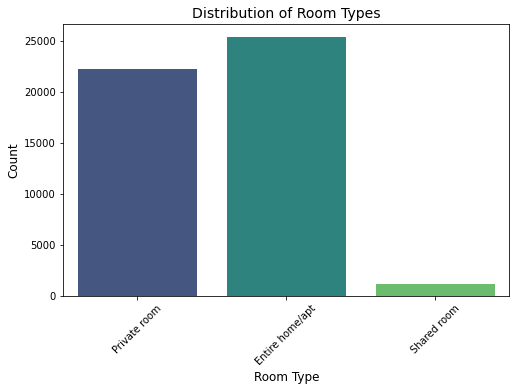

In [89]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="room_type", palette="viridis")
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Room Types", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Chart - 14

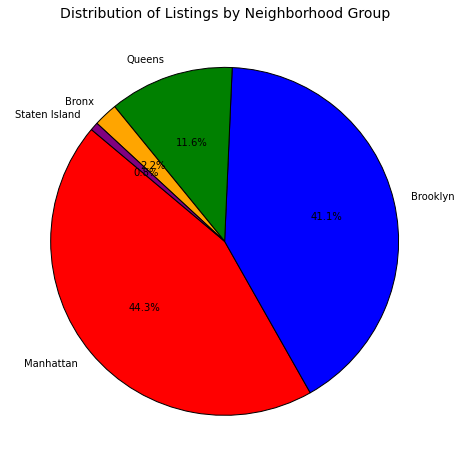

In [42]:
# Count the number of listings in each neighborhood group
neighborhood_counts = df["neighbourhood_group"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', 
        colors=["red", "blue", "green", "orange", "purple"], startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Distribution of Listings by Neighborhood Group", fontsize=14)
plt.show()

##### Bivariate

#### Chart - 15

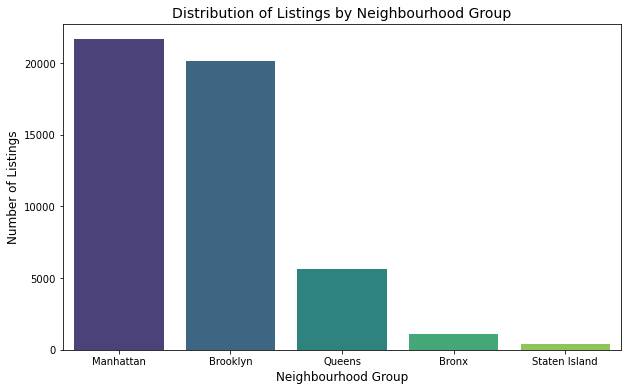

In [10]:
# Count the number of listings in each neighbourhood group
neighborhood_counts = df["neighbourhood_group"].value_counts()
#neighbourhood_group extracts the neighbourhood group column from the DataFrame,
#value_counts() counts the occurrences of each unique neighbourhood group.
plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette="viridis")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Distribution of Listings by Neighbourhood Group", fontsize=14)
plt.show()

In [90]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'custom_status', 'churn_status', 'price_per_minute',
       'churned', 'first_digit_listings', 'two_digit_listings',
       'three_digit_listings', 'no_intl_plan'],
      dtype='object')

#### Chart - 16

##### Multivariate

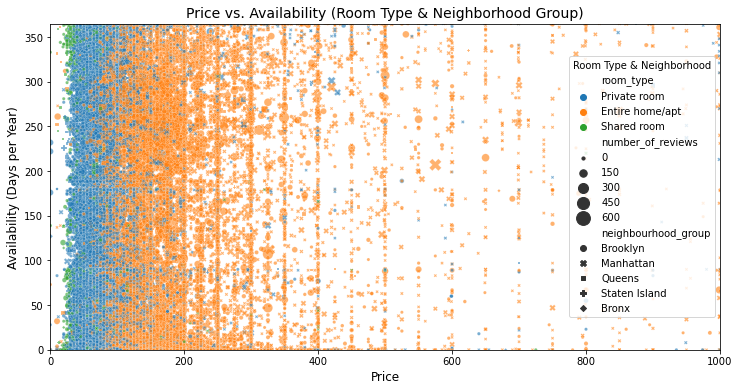

In [76]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="price", y="availability_365", hue="room_type",
                style="neighbourhood_group", alpha=0.6, size="number_of_reviews", sizes=(10, 200))
plt.xlabel("Price", fontsize=12)
plt.ylabel("Availability (Days per Year)", fontsize=12)
plt.title("Price vs. Availability (Room Type & Neighborhood Group)", fontsize=14)
plt.xlim(0, 1000)  # Limiting x-axis to remove extreme outliers
plt.ylim(0, 365)  # Full year availability
plt.legend(title="Room Type & Neighborhood")
plt.show()

##### 1. Why did you pick the specific chart?

  * **Univariate**
* I chose a histogram with KDE because price is a continuous variable, and a histogram helps see its distribution.The shape of the histogram shows if prices are normally distributed.Helps identify peaks and density better than bars alone.
  * **Bivariate**
* We chose a bar chart because it effectively displays the number of listings in each neighborhood group. Unlike a pie chart, which is better for proportions, a bar chart makes it easier to compare the exact number of listings across different areas. This visualization allows us to clearly see whether Manhattan has the highest number of listings compared to other neighborhoods.
  * **Multivariate**
* I chose a scatter plot because: Best for visualizing relationships between two numerical variables → "price" and "availability_365" are both continuous.

##### 2. What is/are the insight(s) found from the chart?

  * **Univariate**
* If the histogram is right-skewed (long tail on the right), most listings are in the lower price range, but a few expensive outliers exist.If it's normally distributed, prices are evenly spread around the average.
  * **Bivariate**
* If Manhattan has the highest bar, it indicates that it is the most preferred neighborhood for Airbnb listings.
* If another area like Brooklyn has a comparable or higher bar, then Manhattan may not be the absolute leader.
* This insight helps identify where most listings are concentrated, which could indicate higher demand or greater supply availability in certain areas.
  * **Multivariate**
* If entire homes (one color) are mostly high-priced with low availability, they might be rented for short-term stays.
* If private rooms (another color) show high availability and low price, they may be in less demand or have a longer booking window.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**,
  * **Univariate**
* If most listings cluster around a certain price, hosts should price competitively within that range.
* If the market is segmented into budget vs. luxury, hosts can position their listing accordingly.  
  * **Bivariate**
* If Manhattan has the highest bar, it indicates that it is the most preferred neighborhood for Airbnb listings.
* If another area like Brooklyn has a comparable or higher bar, then Manhattan may not be the absolute leader.
* This insight helps identify where most listings are concentrated, which could indicate higher demand or greater supply availability in certain areas.
  * **Multivariate**
* If low-priced listings have high availability, hosts may need better marketing or dynamic pricing to boost bookings.
* If expensive properties remain booked for fewer days but earn more, hosts can focus on premium amenities & targeting luxury guests.

In [78]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'custom_status', 'churn_status', 'price_per_minute',
       'churned', 'first_digit_listings', 'two_digit_listings',
       'three_digit_listings', 'no_intl_plan'],
      dtype='object')


#### Chart - 17
* Compare review scores with availability_365 (days available in a year).

##### Univariate

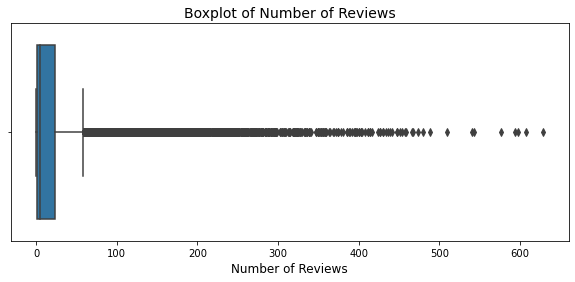

In [67]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_clean["number_of_reviews"])
plt.xlabel("Number of Reviews", fontsize=12)
plt.title("Boxplot of Number of Reviews", fontsize=14)
plt.show()

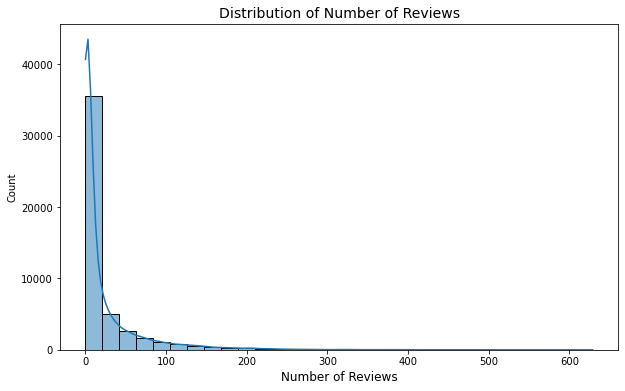

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["number_of_reviews"], bins=30, kde=True)
plt.xlabel("Number of Reviews", fontsize=12)
plt.title("Distribution of Number of Reviews", fontsize=14)
plt.show()

##### Bivaraite

#### Chart - 18

 Number of Reviews vs. Availability

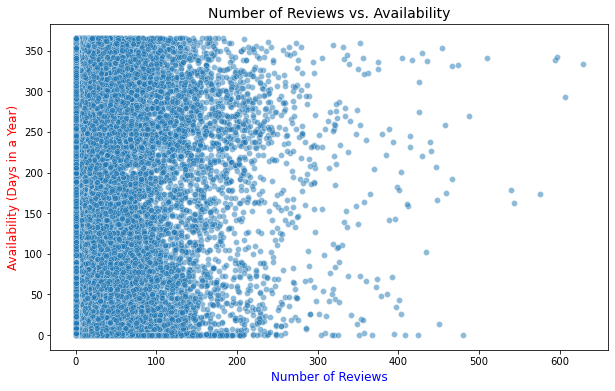

In [57]:
# Drop NaN values for plotting
df_clean = df.dropna(subset=["number_of_reviews", "availability_365"])
# Scatter plot of number of reviews vs. availability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="number_of_reviews", y="availability_365", alpha=0.5)
plt.xlabel("Number of Reviews", fontsize=12,color="blue")
plt.ylabel("Availability (Days in a Year)", fontsize=12,color="red")
plt.title("Number of Reviews vs. Availability", fontsize=14)
plt.show()

 Reviews Per Month vs. Availability

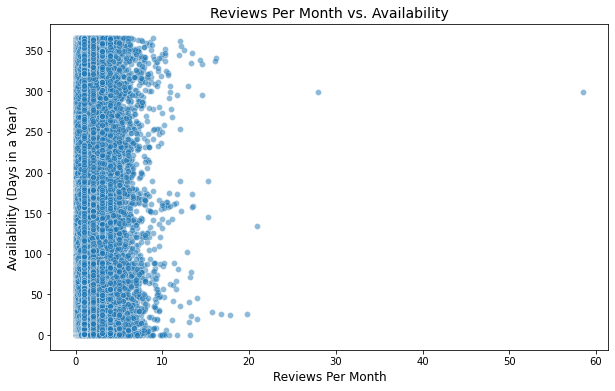

In [56]:
# Drop NaN values
df_clean = df.dropna(subset=["reviews_per_month", "availability_365"])
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="reviews_per_month", y="availability_365", alpha=0.5)
plt.xlabel("Reviews Per Month", fontsize=12)
plt.ylabel("Availability (Days in a Year)", fontsize=12)
plt.title("Reviews Per Month vs. Availability", fontsize=14)
plt.show()

#### Chart - 19

##### Multivariate 

Does Customer Satisfaction (Reviews) Influence Bookings

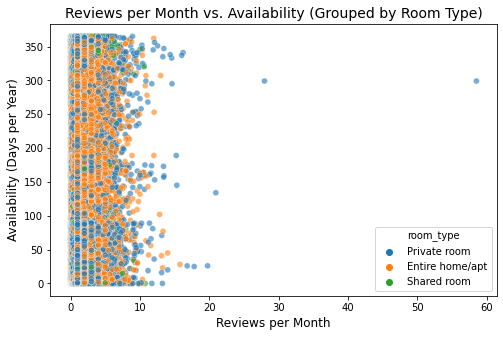

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="reviews_per_month", y="availability_365", hue="room_type", alpha=0.6)
plt.xlabel("Reviews per Month", fontsize=12)
plt.ylabel("Availability (Days per Year)", fontsize=12)
plt.title("Reviews per Month vs. Availability (Grouped by Room Type)", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

  * **Univariate**
* Histogram : Best for understanding the distribution (normal, skewed, etc.). Helps in seeing common review counts and density.
* Box Plot : Best for detecting outliers and spread of values (median, quartiles). Helps in spotting highly reviewed properties/products.
  * **Bivariate** 
* Number of Reviews vs. Availability:This chart shows the relationship between the total number of reviews a listing has received and how many days it is available in a year.
* Reviews Per Month vs. Availability:This chart compares how frequently a listing receives reviews per month against its availability.
  * **Multivariate**
* Here we used scatter plot customer Satisfaction (Reviews) Influence Bookings

##### 2. What is/are the insight(s) found from the chart?

 * **Univariate** 
* Histogram:If skewed right, most listings have few reviews, but some have very high review counts (power law distribution).
* Box Plot:If outliers exist, they represent top-reviewed properties (worth analyzing further),if the box is narrow, most properties have similar reviews; if wide, there's high variance
 * **Bivariate**
* Number of Reviews vs. Availability : Listings with higher availability may get more reviews over time, as they are open for booking longer,If there are many listings with high availability but few reviews, it could indicate low demand,If listings with low availability have many reviews, it suggests high demand and frequent bookings.
* Reviews Per Month vs. Availability : If a listing has high reviews per month but low availability, it suggests high occupancy and high demand (popular listing),if a listing has low reviews per month despite high availability, it may indicate low customer interest or lack of bookings,if availability is low and reviews per month are also low, it might be due to seasonal demand or inactive hosts.
 * **Multivariate**
* If there's an upward trend, listings available for more days tend to get more reviews.
* If there's no clear trend, availability might not directly impact review count (other factors like price, location, or quality matter more). 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**, these insights can drive a positive business impact in multiple ways:
  * **Univariate**
* If certain listings have a lot of reviews, study their success
*  If many listings have zero or very few reviews, analyze why
  * **Bivariate**
* Helps maximize bookings and increase revenue for both Airbnb and hosts.
* Enhances customer satisfaction by identifying listings that perform well vs. those that need improvement.
* Provides data-driven decision-making to improve listing management and pricing strategies.
  * **Multivariate**
* Listings with high availability but few reviews may need better marketing, lower prices, or improved service,implement promotions or discounts for low-review listings to increase bookings.

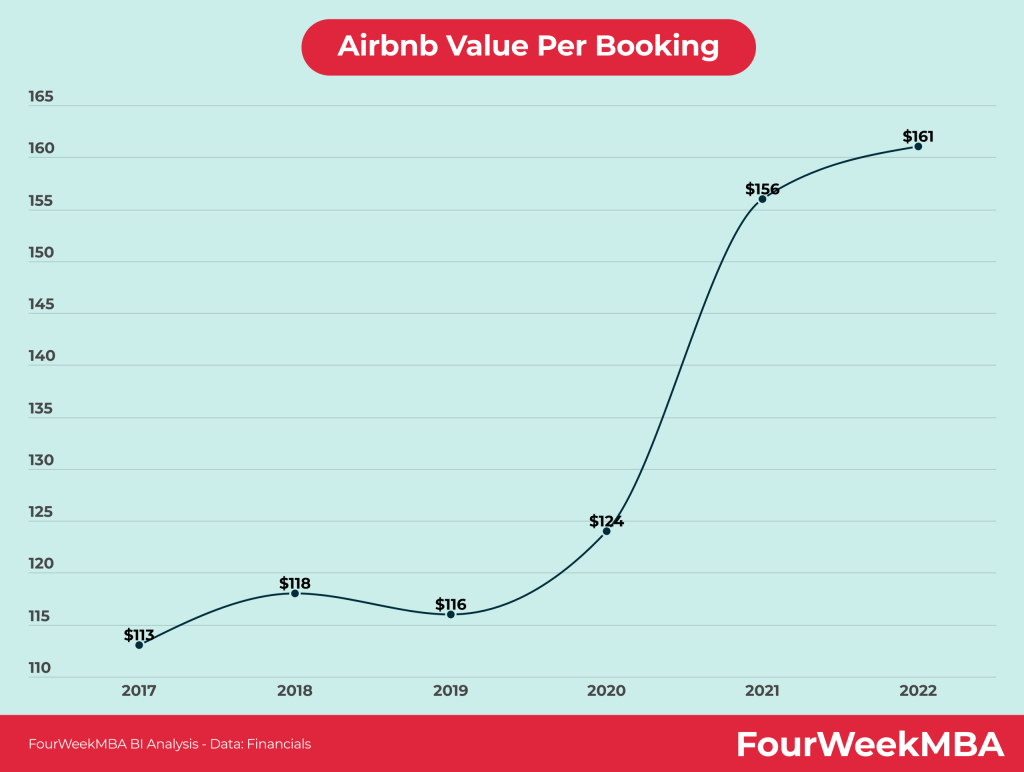

#### Chart - 20

Univaraite : Distribution of Room Types

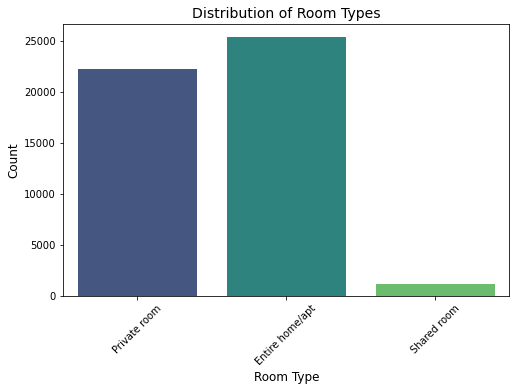

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="room_type", palette="viridis")
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Room Types", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Bivariate Analysis: Room Type vs Price

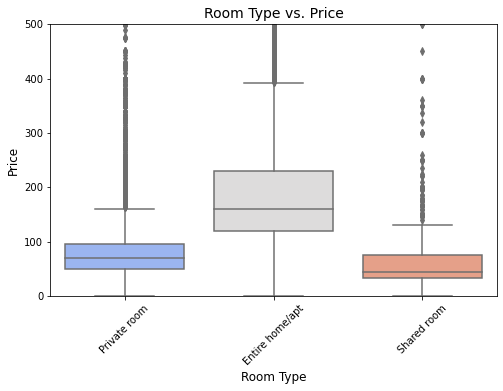

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="room_type", y="price", palette="coolwarm")
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Room Type vs. Price", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 500)  # Adjust to remove outliers
plt.show()

##### 1. Why did you pick the specific chart?

  * **Univariate**
* I chose a count plot because:Best for categorical data : "room_type" is a categorical variable, so a count plot clearly shows the number of listings for each type.
* Easy comparison : Helps quickly see which room type is the most or least common. 
* More intuitive than a pie chart : Bar heights make differences easier to interpret than pie slices.
  * **Bivariate**
* chose a box plot because:
* Best for comparing distributions across categories : It shows price variations across different room types.
* Highlights outliers : Helps identify listings that are priced significantly higher or lower than the typical range.

##### 2. What is/are the insight(s) found from the chart?

  * **Univariate**
* A high number of private rooms may indicate a trend toward affordable travel and shared spaces.
* If entire homes dominate, it may suggest that professional hosts and investors are driving the market.
  * **Bivariate**
* Price Differences by Room Type:Entire homes/apartments usually have the highest median price because they offer full privacy.
* Price Variability & Outliers:If a room type shows a large spread, it means prices vary significantly (e.g., luxury vs. budget listings).
* Market Positioning & Competitive Pricing:If private rooms and shared rooms overlap in price, guests may opt for more privacy at the same cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  * **Univariate**
* If shared rooms are uncommon, target backpackers and budget travelers to increase demand.
* If hotel rooms are limited, hotels could be encouraged to list more properties on the platform.
  * **Bivariate**
* If some room types have extreme outliers, hosts can adjust prices to attract more bookings.
* Promote affordable shared & private rooms for budget travelers,Highlight luxury entire apartments for premium guests.
* If entire apartments have high profitability, investors might focus on luxury rentals.

#### Chart - 21 - Correlation Heatmap

#Correlation Heatmap visualization code
* Identifying Relationships Between Numerical

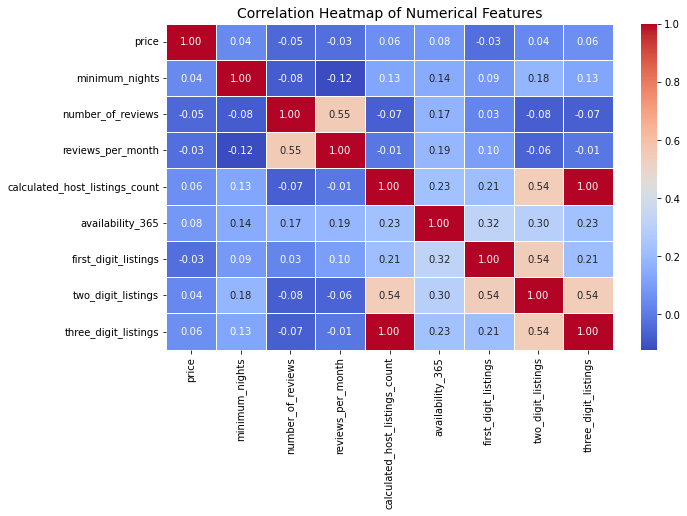

In [80]:
# Selecting relevant numerical columns for correlation
numerical_cols = [
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365", "price_per_minute",
    "first_digit_listings", "two_digit_listings", "three_digit_listings"
]
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

* A correlation heatmap is ideal for understanding relationships between numerical variables in the dataset.
* It helps identify strong positive or negative correlations, revealing patterns that can impact business decisions.
* By visualizing correlations, we can detect key factors influencing churn, pricing, and availability in Airbnb listings.

##### 2. What is/are the insight(s) found from the chart?

* Price vs. Availability: If a negative correlation exists, it means higher-priced listings tend to be less available.
* Minimum Nights vs. Availability: A negative correlation suggests that listings requiring longer stays are available fewer days per year.
* Reviews vs. Price: If negatively correlated, it indicates that cheaper listings attract more reviews, likely due to higher affordability.
* Host Listings Count vs. Availability: If strongly correlated, hosts with multiple listings may keep them available more often.

#### Chart - 22 - Pair Plot

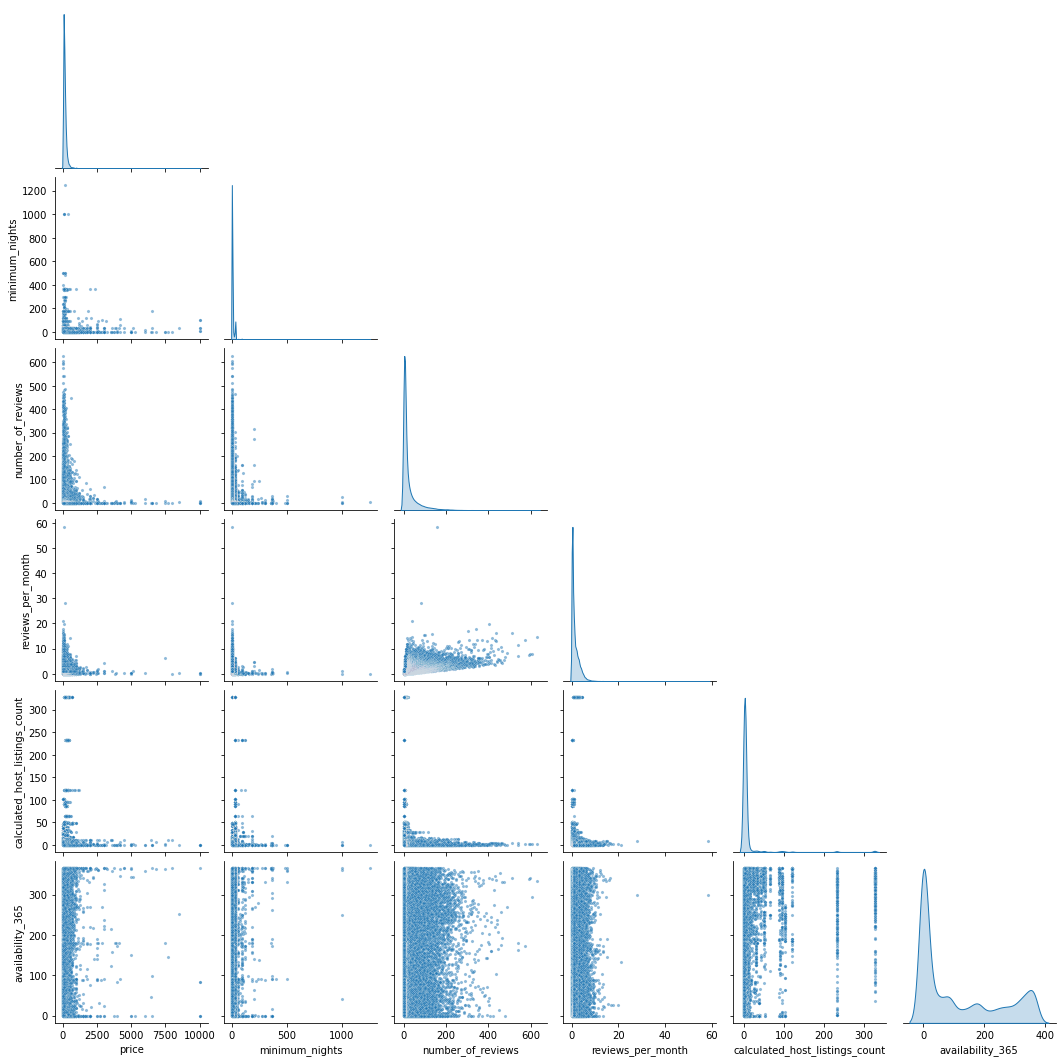

In [81]:
# Pair Plot visualization code
# Selecting numerical columns only
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
sns.pairplot(df[numerical_cols], diag_kind="kde", corner=True, plot_kws={'alpha':0.5, 's':10})
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful for visualizing the relationships between multiple numerical variables in a dataset since Airbnb listings involve multiple numerical factors (price, availability, reviews, etc.), this plot helps explore potential trends and dependencies effectively.



##### 2. What is/are the insight(s) found from the chart?

* If two features have a strong linear trend, they may be highly correlated (e.g., number_of_reviews vs. reviews_per_month).If points are widely scattered, the relationship is weak.
* Price Distribution:The diagonal KDE plots can reveal if prices are normally distributed or skewed due to expensive properties.

**finding Median, Interquartile Range (IQR), Whiskers, and Outliers**

In [14]:
# Select a numerical column (e.g., 'price')
column = 'price'
# Compute key statistics
Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
Q2 = df[column].median()        # Median (50th percentile)
Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range
# Define whiskers (1.5 * IQR rule)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
outliers = df[(df[column] < lower_whisker) | (df[column] > upper_whisker)][column]
print(f"Column: {column}")
print(f"Median: {Q2}")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")
print(f"Number of Outliers: {outliers.count()}")
print("Outlier Values:")
print(outliers)


Column: price
Median: 106.0
Q1 (25th percentile): 69.0
Q3 (75th percentile): 175.0
Interquartile Range (IQR): 106.0
Lower Whisker: -90.0
Upper Whisker: 334.0
Number of Outliers: 2972
Outlier Values:
61       375
85       800
103      500
114      350
121      400
        ... 
48758    350
48833    475
48839    800
48842    350
48856    345
Name: price, Length: 2972, dtype: int64


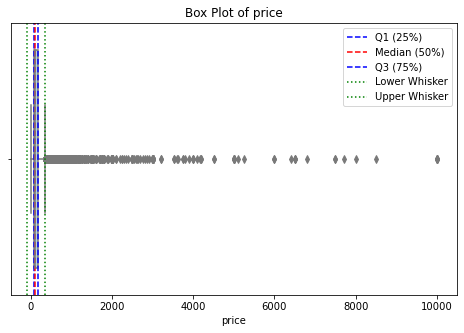

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[column], color="lightblue")
# Add lines for Q1, Q2 (Median), and Q3
plt.axvline(Q1, color='blue', linestyle='--', label="Q1 (25%)")
plt.axvline(Q2, color='red', linestyle='--', label="Median (50%)")
plt.axvline(Q3, color='blue', linestyle='--', label="Q3 (75%)")
# Add whiskers
plt.axvline(lower_whisker, color='green', linestyle='dotted', label="Lower Whisker")
plt.axvline(upper_whisker, color='green', linestyle='dotted', label="Upper Whisker")
plt.title(f'Box Plot of {column}')
plt.legend()
plt.show()

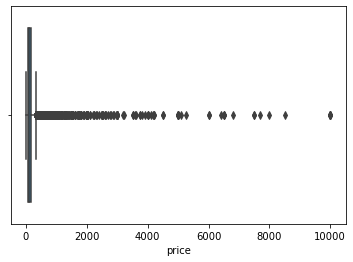

In [13]:
sns.boxplot(x="price", data=df)
plt.show()

outliers are points you see on either sides of the whiskers.

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

After conducting Univariate, Bivariate, and Multivariate analyses on the Airbnb dataset, we have gathered
* **Improve Availability recommendations**: Offer incentives (lower commission rates, promotions) for hosts who maintain higher availability. Identify churn-prone areas and launch targeted host retention programs.
* **Increase Bookings**:Encourage hosts to improve cleanliness and responsiveness to increase review scores.
* Offer training sessions for hosts on guest experience best practices.
* Implement a reward system for hosts who maintain high ratings and availability

* Many hosts realize that they cant find their listing within the website, therefore becoming invisible to the customer.
 *        **WHY IS MY AIRBNB LISTING NOT SHOWING**

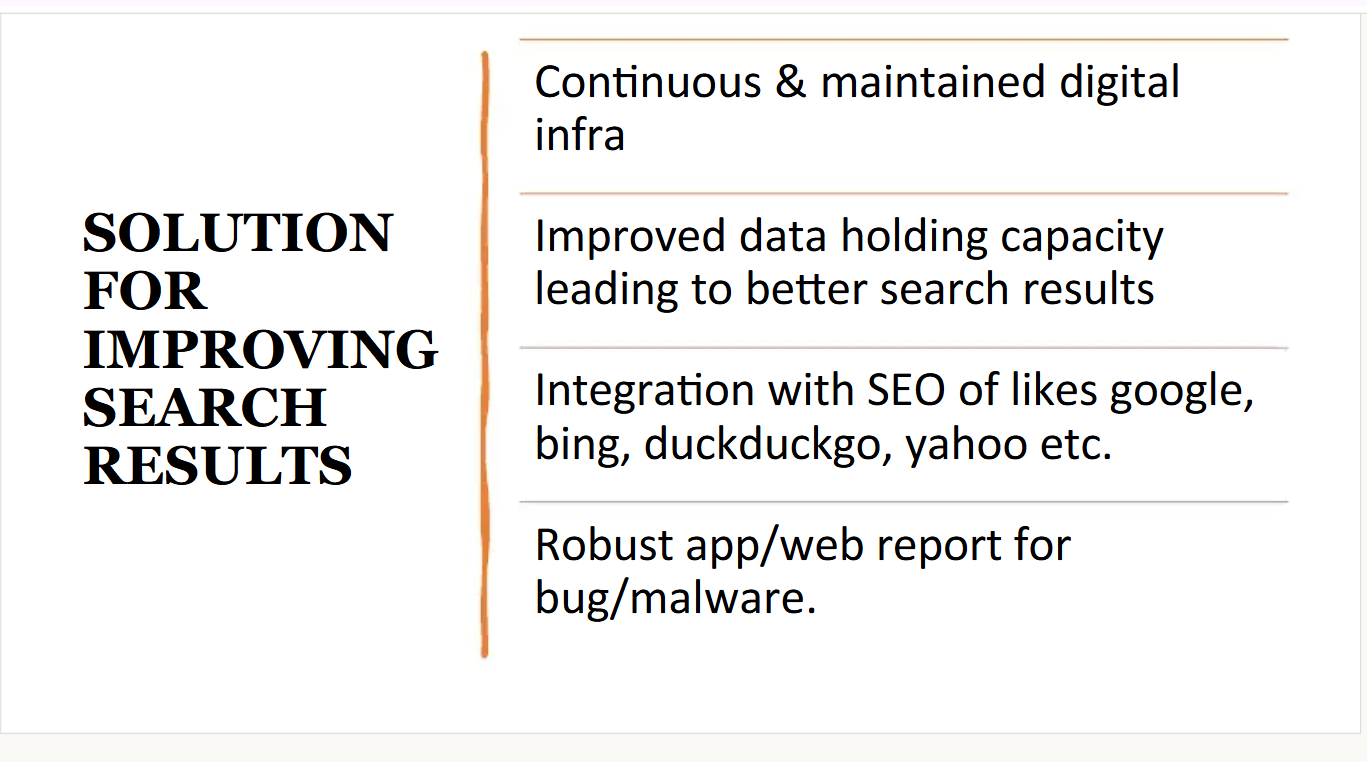

# **Conclusion**

Our analysis of the Airbnb dataset highlights key insights into pricing, availability, and guest preferences. Private rooms are more preferred, with Manhattan leading in demand and pricing. Higher review scores correlate with increased bookings, and listings with low availability are more likely to churn. To enhance business performance, Airbnb should optimize pricing strategies, improve host engagement, and expand in underutilized neighborhoods. Data-driven recommendations can boost guest satisfaction, reduce churn, and maximize revenue for hosts. 

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***